In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("twitter_training.csv")
display(df)

,Date,sentiment_score,Open,High,Low,Close,Out
0,2020-11-01,0.305093,394.000000,406.980000,392.300000,400.500000,0
1,2020-11-02,0.061635,394.000000,406.980011,392.299988,400.510010,0
2,2020-11-03,0.180670,409.730011,427.769989,406.690002,423.899994,0
3,2020-11-04,0.534486,430.619995,435.399994,417.100006,420.980011,1
4,2020-11-05,0.279628,428.299988,440.000000,424.000000,438.089996,0
...,...,...,...,...,...,...,...
390,2021-11-26,0.821676,1099.469971,1108.780029,1081.000000,1081.920044,1
391,2021-11-27,0.513672,1099.469971,1108.780029,1081.000000,1081.920044,1
392,2021-11-28,0.819714,1099.469971,1108.780029,1081.000000,1081.920044,1
393,2021-11-29,0.292264,1100.989990,1142.670044,1100.189941,1136.989990,0


In [2]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df2 = pd.read_csv("sentiment_analysis_last_week.csv")
display(df2)
data2 = df2.to_numpy()
x_last = [arr[0:6] for arr in data2]
x_last = np.array(sc.fit_transform(x_last))
print(x_last)
y_last = [0, 1, 1, 1, 1, 1,0]
x_last = np.asarray(x_last)
y_last = np.asarray(y_last)

,open,high,low,close,Sentiment_score
0,0.180165,1144.369995,1168.000000,1118.000000,1144.760010
1,0.129185,1160.699951,1172.839966,1090.760010,1095.000000
2,0.525866,1099.060059,1113.000000,1056.650024,1084.599976
3,0.232438,1084.790039,1090.579956,1000.210022,1014.969971
4,0.446760,1001.510010,1021.640015,950.510010,1009.010010
5,0.168358,1001.510010,1021.640015,950.510010,1009.010010
6,0.002182,1001.510010,1021.640015,950.510010,1009.010010


[[0.33986764 0.89741842 0.96798963 1.         1.        ]
 [0.24251917 1.         1.         0.83736347 0.63344376]
 [1.         0.61279028 0.6042329  0.6337096  0.55683216]
 [0.43968464 0.52314882 0.45595214 0.29673422 0.04390395]
 [0.84894312 0.         0.         0.         0.        ]
 [0.31732037 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


In [3]:
data = df.to_numpy()
x = [arr[1:6] for arr in data]
y = [arr[6] for arr in data]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train = np.array(sc.fit_transform(x_train))
x_test = np.array(sc.fit_transform(x_test))

print(len(x_train), len(x_train[0]))
print(len(y_train))


355 5
355


In [4]:
print(x_train[0])

[0.21496392 0.51998427 0.55112312 0.52751307 0.54127077]


In [5]:
training_data = np.asarray(x_train)
training_labels = np.asarray(y_train)
test_data = np.asarray(x_test)
test_labels = np.asarray(y_test)

In [6]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

def plot_loss(l, vl):
    sn.set_style("darkgrid")
    plt.plot(l)
    plt.plot(vl)
    plt.show()
def plot_acc(acc, vacc):
    sn.set_style("darkgrid")
    plt.plot(acc)
    plt.plot(vacc)
    plt.show()


# plot confusion matrix
import seaborn as sn
def print_confusion_matrix(array):
  df_cm = pd.DataFrame(array, range(2), range(2))
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)

def get_out(val):
    if val>0.5:
        return 1
    else:
        return 0

class binary_classifier(object):
    def __init__(self, input_dim, hidden_dim):
      input_layer = Input(shape=(input_dim,))
      
      hidden_layer = Dense(hidden_dim, activation='relu')(input_layer)
      second_hidden_layer = Dense(hidden_dim, activation='relu')(hidden_layer)
      output_layer = Dense(1, activation='sigmoid')(second_hidden_layer)

      self._bm = Model(input_layer, output_layer)
      self._bm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    def train(self, training_data, training_labels, test_data, test_labels, batch_size, epochs):
      history = self._bm.fit(training_data, 
                                    training_labels,
                                    verbose=0,
                                    epochs = epochs,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    validation_data=(
                                            test_data, 
                                            test_labels))
      accuracy = history.history['accuracy']
      loss = history.history['loss']
      val_accuracy = history.history['val_accuracy']
      val_loss = history.history['val_loss']
      return accuracy, loss, val_accuracy, val_loss
    
    def last_week_matrix(self, x_last, y_last):
        output2 = self._bm.predict(x_last)
        y2 = [get_out(prediction) for prediction in output2]
        return y2, y_last
    
    def compute_confusion_matrix(self, test_data, test_labels):
        output = self._bm.predict(test_data)
        y_pred = [get_out(prediction) for prediction in output]
        #predicted_labels = np.array([item for item in y_pred])
        y2, y2_true = self.last_week_matrix(x_last, y_last)
        print(y2)
        cm = confusion_matrix(y_pred, test_labels)
        cm2 = confusion_matrix(y2, y2_true)
        return cm, cm2
    
    

[0, 1, 1, 1, 1, 0, 0]
Loss - Orange | Validation Loss - Blue


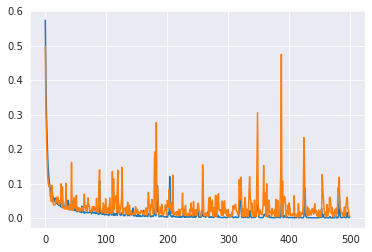

Accuracy - Orange | Validation Accuracy - Blue


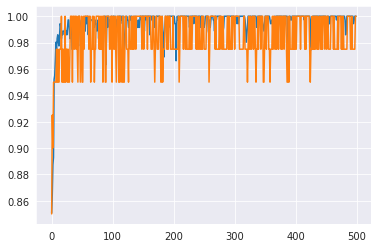

Confusion Matrix: 100 hidden neurons


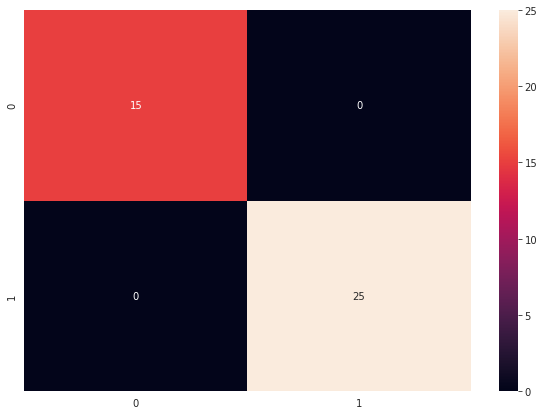

In [39]:
bc = binary_classifier(5, 100)
acc100, l100, vacc100, vl100 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm100, cm1002 = bc.compute_confusion_matrix(test_data, test_labels)

print("Loss - Orange | Validation Loss - Blue")
plot_loss(l100, vl100)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc100, vacc100)
print("Confusion Matrix: 100 hidden neurons")
print_confusion_matrix(cm100)

2021-12-06 22:28:12.452777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-12-06 22:28:12.452805: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-12-06 22:28:12.453123: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[0, 1, 1, 1, 1, 0, 0]
Loss - Orange | Validation Loss - Blue


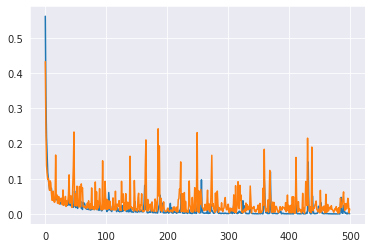

Accuracy - Orange | Validation Accuracy - Blue


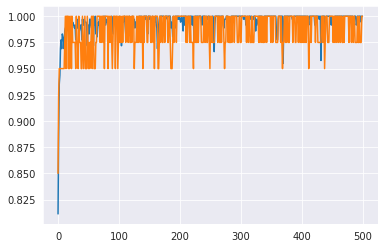

Confusion Matrix: 200 hidden neurons


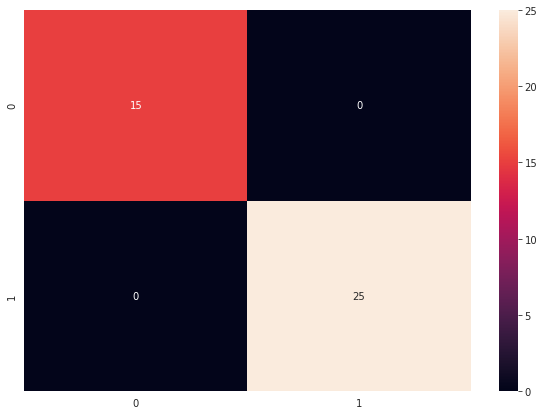

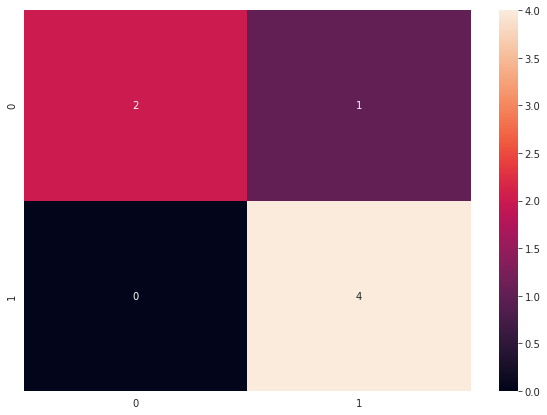

In [7]:
bc = binary_classifier(5, 200)
acc200, l200, vacc200, vl200 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm200, cm2002 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l200, vl200)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc200, vacc200)
print("Confusion Matrix: 200 hidden neurons")
print_confusion_matrix(cm200)
print_confusion_matrix(cm2002)

In [41]:
bc = binary_classifier(5, 400)
acc400, l400, vacc400, vl400 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm400 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l400, vl400)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc400, vacc400)
print("Confusion Matrix: 400 hidden neurons")
print_confusion_matrix(cm400)

KeyboardInterrupt: 

In [ ]:
bc = binary_classifier(5, 600)
acc600, l600, vacc600, vl600 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm600 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l600, vl600)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc600, vacc600)
print("Confusion Matrix: 600 hidden neurons")
print_confusion_matrix(cm600)

In [30]:
print(cm2002)

[[1 2]
 [2 2]]


In [ ]:
cm2002 = [[2 1],[0 4]]
